# Stochastic Gradient Descent
In this notebook, we perform gradient descent (batch_size = N) and stochastic gradient descent (SGD) (batch_size << N).

For reasonable results:

- gradient descent: set the batch size (batch_size) equal to the total number of observations (N). The gradient to update $\hat{\theta}$: $y'y-2\hat{\theta}'X'y + \hat{\theta}'X'X\hat{\theta} = -2X'y + X'X\hat{\theta} = -2X'y + X'\hat{y}$.
- SGD: set the batch size to 10 and the learning rate (lr) to 1e-2.
- I also included an analytical solution where we apply $\theta = (X'X)^{-1}X'y$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000
b = np.ones(N)
x_0 = np.random.normal(0,1, N)

# data
X = np.c_[b, x_0]
 
# normal error
e = np.random.normal(0,1, N)

## enter 
theta = np.array([1,5])

# calculate y
y = X.dot(theta) + e
print(len(y))

100000


In [ ]:
def gradient_descent(X, y, num_it, lr, batch_size):
  
  # initial weights
  theta_hat = np.random.normal(0,1,2)
  
  # lists to store learning process
  log, theta_0, theta_1, mse = [], [], [], []
  
  for i in range(0,num_it): 
    # batch_size
    idx = np.random.randint(0, len(X), batch_size)
    Xs = X[idx]
    ys = y[idx]
    n = len(X)

    # predict y
    y_hat = Xs.dot(theta_hat)

    # gradient of e'e w.r.t. theta_hat = (y - y_hat)^2 = gradient of y'y-2*theta_hat'X'y + theta_hat'X'Xtheta_hat w.r.t theta_hat =   
    gradient_w = -2 * Xs.T.dot(ys) + 2*Xs.T.dot(y_hat)
    
    # weight update
    theta_hat = theta_hat - lr * gradient_w
    
    log.append(theta_hat)
    theta_0.append(theta_hat[0])
    theta_1.append(theta_hat[1])
    loss = (y_hat - ys).sum()**2
    mse.append(loss)
    print(i," MSE =", np.round((loss).sum()**2,8), "and theta =", np.round_(theta_hat,1), "and gradient =", np.round(gradient_w,0)) 
  return theta_hat, log, mse, theta_0, theta_1

theta_hat, log, mse, theta_0, theta_1 = gradient_descent(X = X, y = y, num_it = 20, lr = 1e-2, batch_size = 10)

print("analytical solution for theta vector = ", np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)))

0  MSE = 2002.15550953 and theta = [0.9 0.5] and gradient = [ -13. -114.]
1  MSE = 3527.41122514 and theta = [1.  1.7] and gradient = [ -15. -128.]
2  MSE = 157.61826358 and theta = [1. 2.] and gradient = [  7. -31.]
3  MSE = 14065.91202677 and theta = [1.2 2.3] and gradient = [-22. -27.]
4  MSE = 249.63166967 and theta = [1.1 2.8] and gradient = [  8. -48.]
5  MSE = 1357.21987055 and theta = [1.2 3.3] and gradient = [-12. -47.]
6  MSE = 1660.08230675 and theta = [1.1 3.5] and gradient = [ 13. -27.]
7  MSE = 2.01100978 and theta = [1.1 4. ] and gradient = [ -2. -42.]
8  MSE = 19.59285926 and theta = [1.2 4.1] and gradient = [ -4. -10.]
9  MSE = 3300.01112724 and theta = [1.3 4.3] and gradient = [-15. -26.]
10  MSE = 122.96312927 and theta = [1.3 4.3] and gradient = [ 7. -1.]
11  MSE = 4954.62254532 and theta = [1.1 4.6] and gradient = [ 17. -27.]
12  MSE = 34.15598005 and theta = [1.  4.7] and gradient = [  5. -10.]
13  MSE = 45.58072937 and theta = [1.  4.7] and gradient = [ 5. -1.]
1

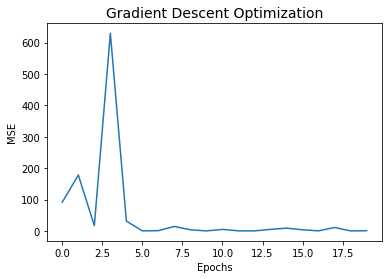

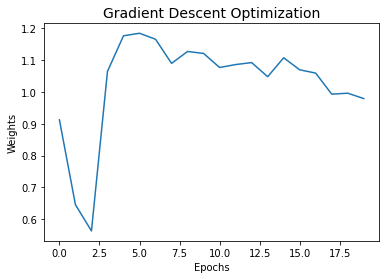

Mean Squared Error : 2.0269905745647363e-07


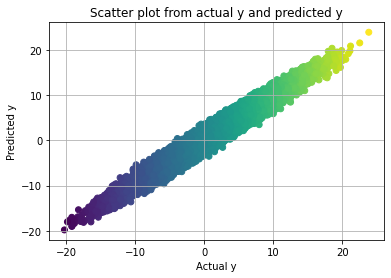

In [ ]:
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(range(len(theta_0)), theta_0)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.show()

# predictions
y_pred = X.dot(theta_hat)

# plot predictions
plt.scatter(y, y_pred, c = y)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
print('Mean Squared Error :',(y - y_pred).sum()/N**2)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


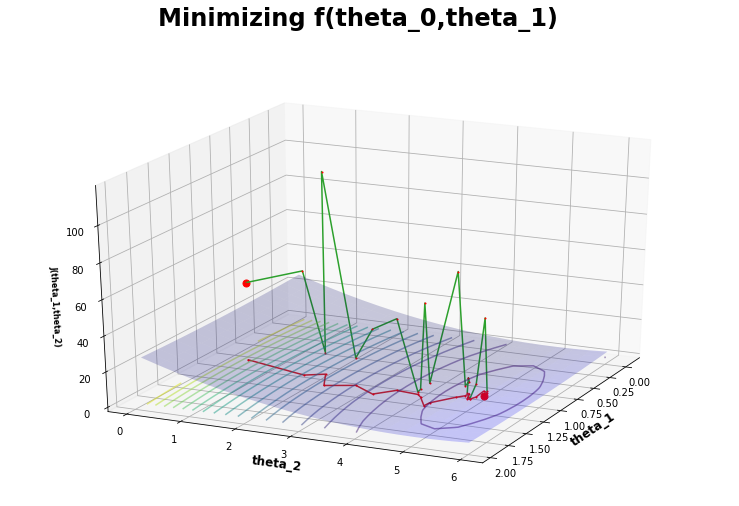

In [ ]:
#Setup of meshgrid of theta values
ms = np.linspace(theta_0[0] - mse[-1], theta[0] + mse[-1], 20)
bs = np.linspace(theta_0[1] - mse[-1], theta[1] + mse[-1], 20)
M, B = np.meshgrid(ms, bs)

def costfunction(X, y, theta_hat):
    return np.sum((X.dot(theta_hat) - y)**2)/(N)

#Computing the cost function for each theta combination
zs = np.array([costfunction(X, y, theta_hat) 
                     for theta_hat in zip(np.ravel(M), np.ravel(B))])
#Reshaping the cost values    
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('theta_1', labelpad=3, fontsize=12, fontweight='bold')
ax.set_ylabel('theta_2', labelpad=3, fontsize=12, fontweight='bold')
ax.set_zlabel('J(theta_1,theta_2)', fontsize=8, fontweight='bold')
ax.view_init(elev=25, azim=25)
ax.plot([theta[0]], [theta[1]], [mse[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([log[0][0]], [log[0][1]], [mse[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in log], [t[1] for t in log], mse , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in log], [t[1] for t in log], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizing f(theta_0,theta_1)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")